In [1]:
import pandas as pd
import numpy as np
!pip install cufflinks
!pip install plotly
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cufflinks as cf
from plotly.offline import plot, iplot
import plotly.graph_objs as go
import plotly.io as pio 
import cufflinks as cf
cf.go_offline()
import plotly
import plotly.graph_objs as go
import plotly.offline as py
import chart_studio.plotly as pyo

In [3]:
import chart_studio
import chart_studio.plotly as pyo 

In [4]:
chart_studio.tools.set_credentials_file(username = 'AIROTIV', api_key='w9A6F1Humpbgnzw7bXO5')

In [5]:
pio.renderers.default = 'colab'

In [6]:
data = pd.read_csv('df_brasil2022.csv')
data

,Unnamed: 0,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-07-01,26,210147125.0,32434063.0,76045,671700,284,30873682.0,888681.0
1,1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-07-02,26,210147125.0,32471847.0,37784,671858,158,30880584.0,919405.0
2,2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-07-03,27,210147125.0,32490422.0,18575,671911,53,30906575.0,911936.0
3,3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-07-04,27,210147125.0,32535923.0,45501,672033,122,30967114.0,896776.0
4,4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-07-05,27,210147125.0,32610514.0,74591,672429,396,31039055.0,899030.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,179,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-12-27,52,210147125.0,36226287.0,35898,693199,230,34875481.0,657607.0
180,180,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-12-28,52,210147125.0,36264721.0,38434,693562,363,34891300.0,679859.0
181,181,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-12-29,52,210147125.0,36302415.0,37694,693734,172,34906985.0,701696.0
182,182,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-12-30,52,210147125.0,36331281.0,28866,693853,119,34938186.0,699242.0


In [7]:
colunas_lixo = ['populacaoTCU2019','regiao','estado', 'municipio','coduf','codmun','codRegiaoSaude','nomeRegiaoSaude','casosAcumulado','casosNovos','Recuperadosnovos','emAcompanhamentoNovos']
data = data.drop(colunas_lixo, axis=1)

In [8]:
data

,Unnamed: 0,data,semanaEpi,obitosAcumulado,obitosNovos
0,0,2022-07-01,26,671700,284
1,1,2022-07-02,26,671858,158
2,2,2022-07-03,27,671911,53
3,3,2022-07-04,27,672033,122
4,4,2022-07-05,27,672429,396
...,...,...,...,...,...
179,179,2022-12-27,52,693199,230
180,180,2022-12-28,52,693562,363
181,181,2022-12-29,52,693734,172
182,182,2022-12-30,52,693853,119


<Axes: >

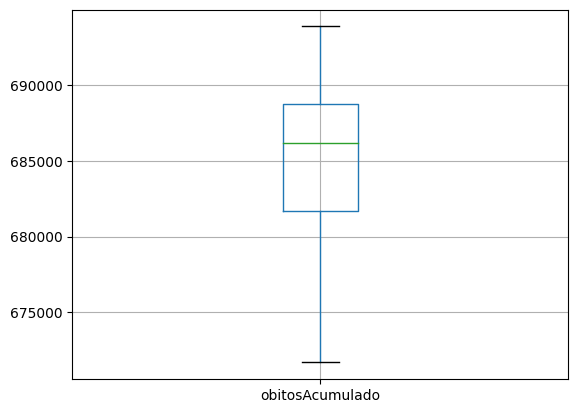

In [9]:
data.boxplot(column = 'obitosAcumulado')

In [10]:
data.iplot(kind='scatter', x='semanaEpi', y='obitosAcumulado')

In [11]:
data.data = pd.to_datetime(data.data)

In [12]:
data['data_mes'] = data.data.dt.to_period('M').astype(str)

In [13]:
mortes_mes = data.groupby(by='data_mes').obitosNovos.sum()

In [15]:
data = [go.Bar(x=mortes_mes.index,
               y=mortes_mes.values,
               marker= {'color': 'tomato'})]

#criando layout
configuracoes_layout = go.Layout(title='Óbitos por mês: ',
                                 yaxis={'title': 'Óbitos novos'},
                                 xaxis={'title': 'Mês'})

#objeto figura

fig = go.Figure(data=data, layout=configuracoes_layout)

#plotando o grafico
py.iplot(fig)
pyo.plot(fig)

'https://plotly.com/~AIROTIV/22/'

In [14]:
data = [go.Scatter(x=mortes_mes.index,
                   y=mortes_mes.values)]

py.iplot(data)
pyo.plot(data)

'https://plotly.com/~AIROTIV/34/'